In [1]:
import GI_parser as GIP
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.ticker import NullFormatter
import glob
import time
import cv2

In [2]:
framebase=GIP.FrameBase("output.txt") # 5 GB OF TOT's STRAIGHT INTO YOUR RAM

Total  10019  frames


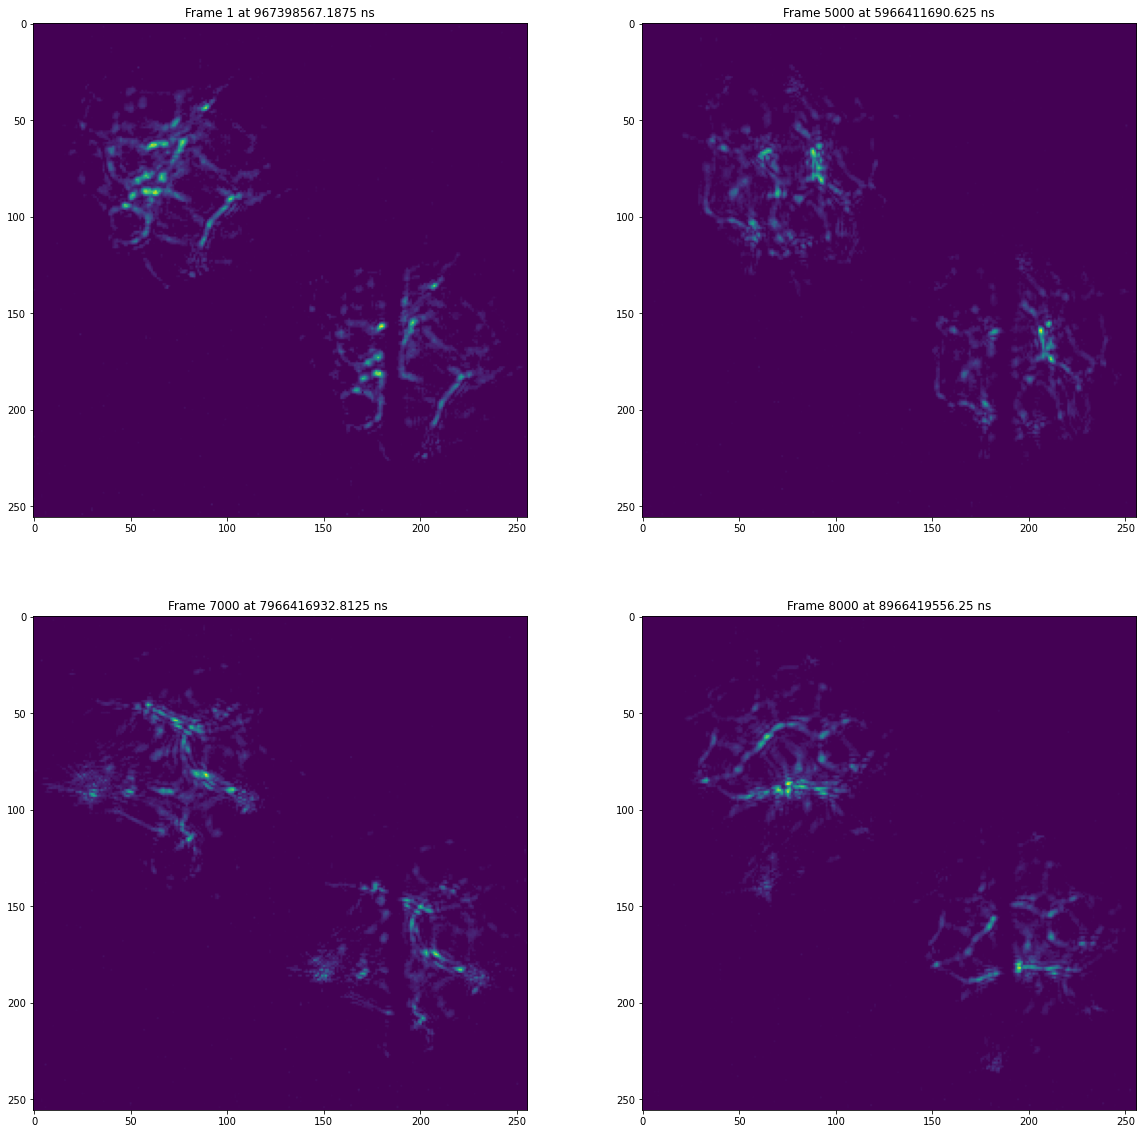

In [3]:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize=(20, 20))





ax[0,0].imshow(framebase[1].data) #   FrameBase[i] returns Frame object
ax[0,1].imshow(framebase[5000].data)# Frame.data returns the numpy array of the frame
ax[1,0].imshow(framebase[7000].data)
ax[1,1].imshow(framebase[8000].data)


ax[0,0].set_title("Frame 1 at {} ns".format(framebase[1].time_ns)) #Frame.time returns time in TimePix units
ax[0,1].set_title("Frame 5000 at {} ns".format(framebase[5000].time_ns))#Frame.time_ns returns time in nanoseconds
ax[1,0].set_title("Frame 7000 at {} ns ".format(framebase[7000].time_ns))
ax[1,1].set_title("Frame 8000 at {} ns".format(framebase[8000].time_ns))


print("Total ",len(framebase.frameList)," frames")

In [4]:

print("Time difference between consecutive triggers (ns)")

for i in range(800,850):
    print(framebase[i+1].time_ns-framebase[i].time_ns)

Time difference between consecutive triggers (ns)
1000003.125
1000001.5625
1000003.125
1000001.5625
1000003.125
1000003.125
1000003.125
1000001.5625
1000003.125
1000003.125
1000001.5625
1000003.125
1000003.125
1000001.5625
1000003.125
1000003.125
1000001.5625
1000003.125
1000003.125
1000001.5625
1000003.125
1000003.125
1000001.5625
1000003.125
1000003.125
1000003.125
1000001.5625
1000003.125
1000003.125
1000001.5625
1000003.125
1000003.125
1000001.5625
1000003.125
1000003.125
1000001.5625
1000003.125
1000003.125
1000003.125
1000001.5625
1000003.125
1000001.5625
1000003.125
1000003.125
1000003.125
1000001.5625
1000003.125
1000003.125
1000001.5625
1000003.125


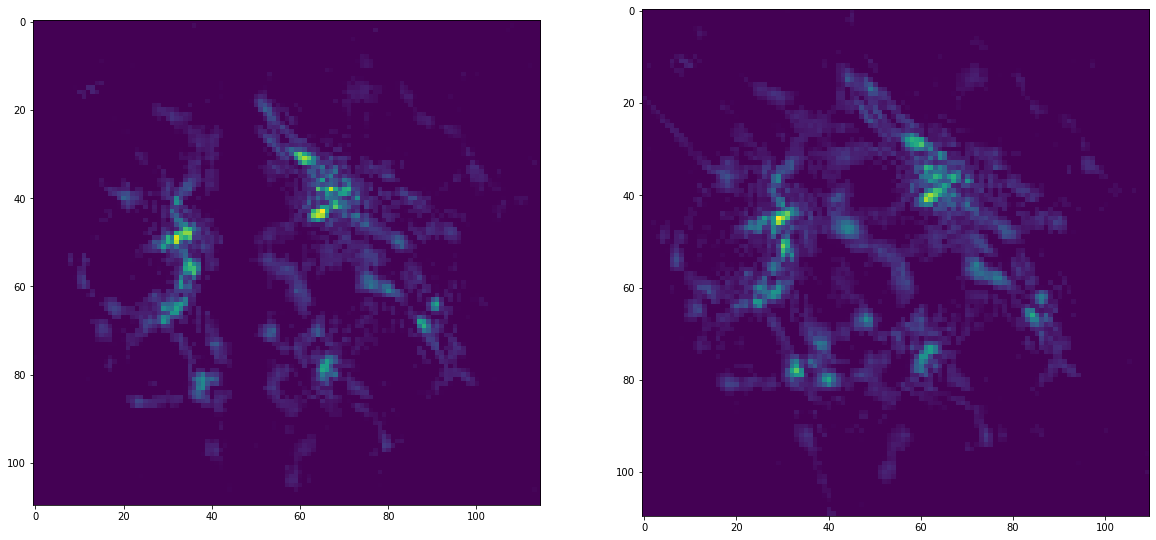

In [5]:
s1x1=120
s1x2=230

s1y1=140
s1y2=255

s2x1=30
s2x2=140

s2y1=25
s2y2=135

beam1=framebase[6000].data[s1x1:s1x2,s1y1:s1y2]
beam2=framebase[6000].data[s2x1:s2x2,s2y1:s2y2]
beam1[50,45]=0
beam1[45,50]=0



fig, ax = plt.subplots(ncols=2,nrows=1, figsize=(20, 20))

ax[0].imshow(beam1)
ax[1].imshow(beam2)

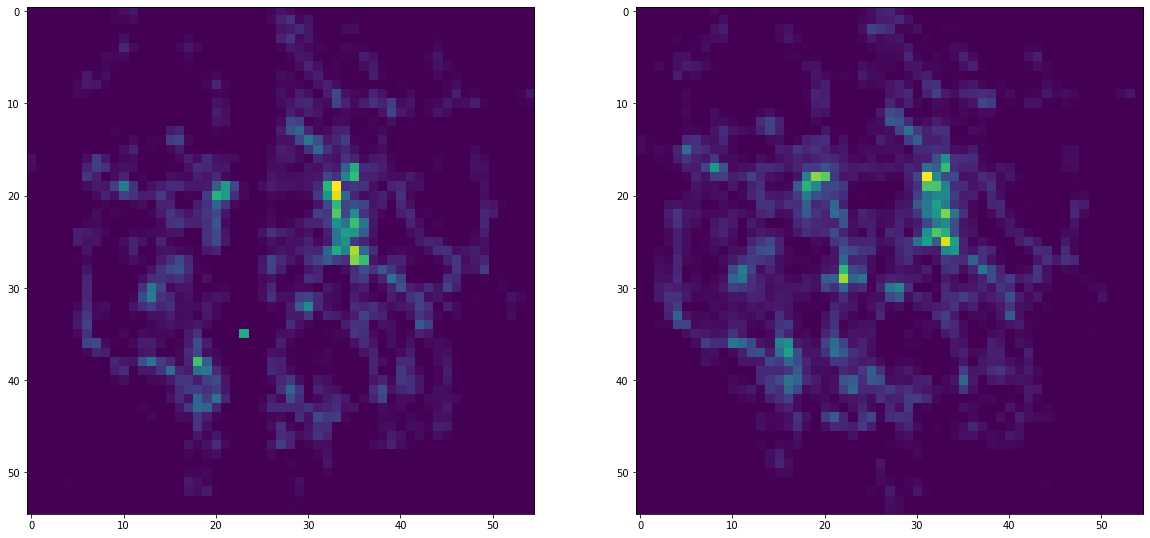

In [11]:
beam1=framebase[5000].data[s1x1:s1x2,s1y1:s1y2]
beam2=framebase[5000].data[s2x1:s2x2,s2y1:s2y2]


beam1_reduced=np.ndarray(shape=(55,55))
beam2_reduced=np.ndarray(shape=(55,55))

for i in range(55):
    for j in range(55):
        beam1_reduced[i,j]=beam1[2*i,2*j]+beam1[2*i+1,2*j]+beam1[2*i,2*j+1]+beam1[2*i+1,2*j+1]
        beam2_reduced[i,j]=beam2[2*i,2*j]+beam2[2*i+1,2*j]+beam2[2*i,2*j+1]+beam2[2*i+1,2*j+1]



beam1_reduced_cp=np.copy(beam1_reduced)
beam2_reduced_cp=np.copy(beam2_reduced)

beam1_reduced_cp[35,23]=10000;

    
fig, ax = plt.subplots(ncols=2,nrows=1, figsize=(20, 20))

ax[0].imshow(beam1_reduced_cp)
ax[1].imshow(beam2_reduced_cp)

In [7]:

pixels=np.ndarray(shape=(110,110,799))


pixel1_1_tot=[]
pixel2_1_tot=[]
pixel1_2_tot=[]
pixel2_2_tot=[]
pixel1_3_tot=[]
pixel2_3_tot=[]

beam1total=[]


for ct in range(1,800):
    beam1=framebase[ct*10].data[s1x1:s1x2,s1y1:s1y2]
    beam2=framebase[ct*10].data[s2x1:s2x2,s2y1:s2y2]


    beam1_reduced=np.ndarray(shape=(55,55))
    beam2_reduced=np.ndarray(shape=(55,55))

    for i in range(55):
        for j in range(55):
            beam1_reduced[i,j]=beam1[2*i,2*j]+beam1[2*i+1,2*j]+beam1[2*i,2*j+1]+beam1[2*i+1,2*j+1]
            beam2_reduced[i,j]=beam2[2*i,2*j]+beam2[2*i+1,2*j]+beam2[2*i,2*j+1]+beam2[2*i+1,2*j+1]



    beam1_reduced_cp=np.copy(beam1_reduced)
    beam2_reduced_cp=np.copy(beam2_reduced)
        
    pixel1_1_tot.append(beam2_reduced_cp[30,24])
    pixel1_2_tot.append(beam2_reduced_cp[40,24])
    pixel1_3_tot.append(beam2_reduced_cp[10,24])
    
    pixel2_1_tot.append(beam2_reduced_cp[25,35])
    pixel2_2_tot.append(beam2_reduced_cp[20,15])
    pixel2_3_tot.append(beam2_reduced_cp[35,35])
    
    
    for i in range(55):
        for j in range(55):
            pixels[i,j,ct-1]=beam2_reduced_cp[i,j]
    
    
    total=0
    for i_t in range(0,55):
        for j_t in range(0,55):
            total+=beam2_reduced[i_t,j_t]
    beam1total.append(total)
            

Text(0.5, 1.0, 'Pixel not behind the object')

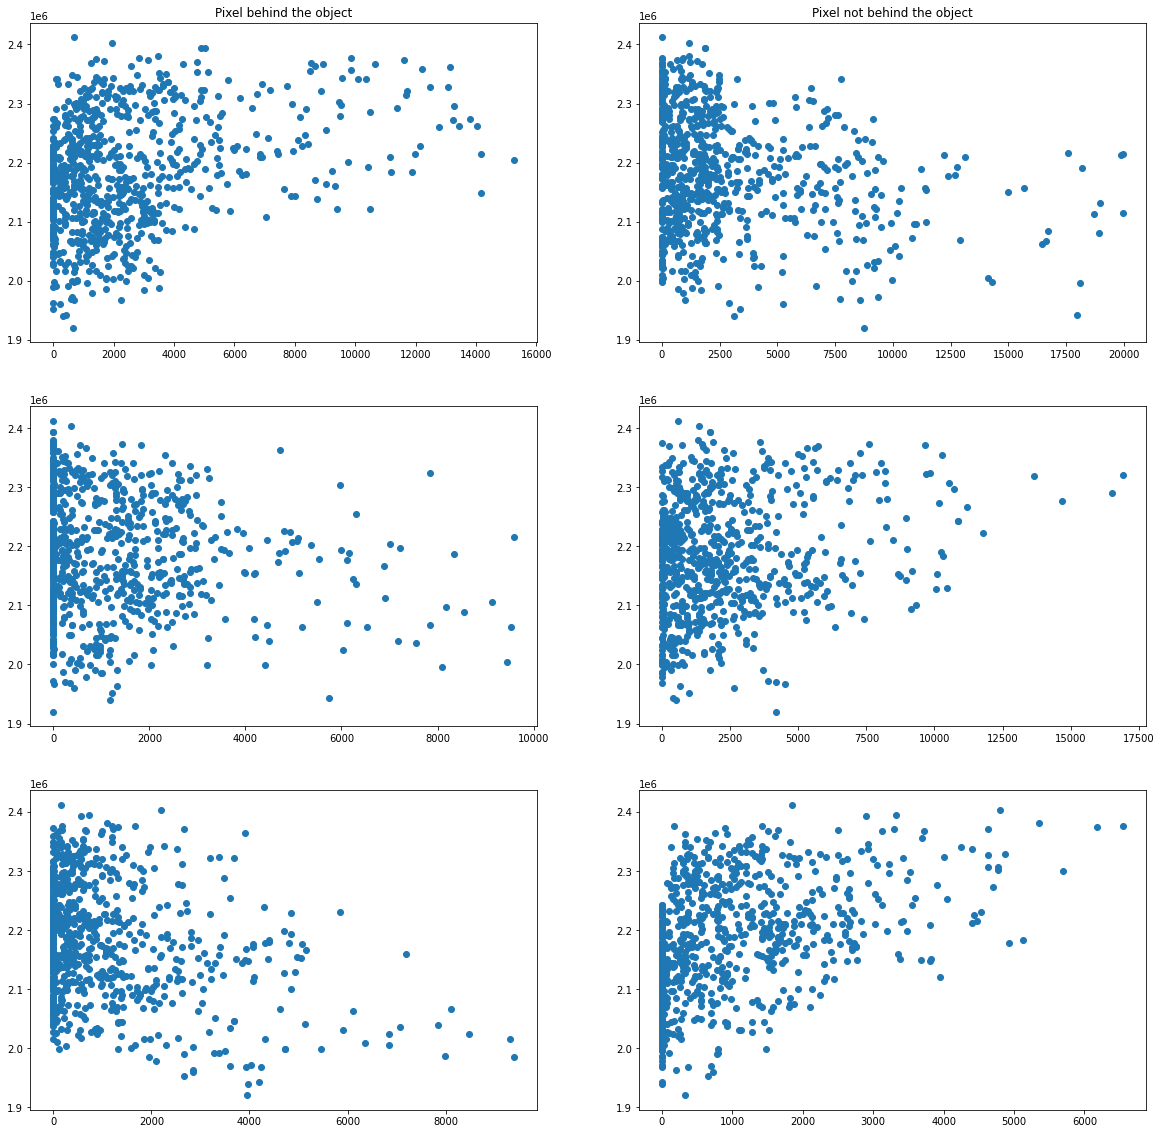

In [8]:
fig, ax = plt.subplots(ncols=2,nrows=3, figsize=(20, 20))
ax[0,0].scatter(pixel1_1_tot,beam1total)
ax[0,0].set_title("Pixel behind the object")

ax[1,0].scatter(pixel1_2_tot,beam1total)
ax[2,0].scatter(pixel1_3_tot,beam1total)


ax[0,1].scatter(pixel2_1_tot,beam1total)
ax[1,1].scatter(pixel2_2_tot,beam1total)
ax[2,1].scatter(pixel2_3_tot,beam1total)
ax[0,1].set_title("Pixel not behind the object")

In [9]:
# fig, ax = plt.subplots(ncols=55,nrows=55, figsize=(500, 500))

# for i in range(55):
#     for j in range(55):
#         print(len(pixels[i,j,:]),len(beam1total))
#         ax[i,j].scatter(pixels[i,j,:],beam1total)
        